## Hello to PyTorch !
***Introduction***

In [ ]:
import numpy as np
import torch
print(torch.__version__)

1.9.0+cu102


In [ ]:
x = np.arange(16).reshape(4, 4)
x = torch.tensor(x, dtype=torch.float32) 
# or x = torch.arange(0, 16).reshpe(4, 4).to(torch.float32)

In [ ]:
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

In [ ]:
y = torch.arange(5)
y

tensor([0, 1, 2, 3, 4])

In [ ]:
y.mean()  # It has been written incorrectly, then we have :


RuntimeError: ignored

In [ ]:
y.to(float).mean()
# OR at the definition it can be y = torch.arange(5).to(float)

tensor(2., dtype=torch.float64)

In [ ]:
z = torch.tensor([1, 2]).float()
z /= 2
z

tensor([0.5000, 1.0000])

**General pipline is looked as below**
  - `torch.zeros(5, requires_grad=True)`
  - `torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)`

**`x.forward()`** computes the output tensor by given input tensor x.

**`x.backward()`** receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

In [ ]:
x = torch.tensor(0., requires_grad=True)
y = torch.sin(x)
y.backward()
x.grad

tensor(1.)

In [ ]:
x = torch.tensor(0., requires_grad=True)
y1 = torch.sin(x)
y2 = torch.sin(x)

print("x.grad=", x.grad)
y1.backward()
print("x.grad=", x.grad)
y2.backward()
print("x.grad=", x.grad)

x.grad= None
x.grad= tensor(1.)
x.grad= tensor(2.)


 ### Generating linear data in PyTorch

In [ ]:
# Remember we have previously defined MSE loss with its gradient?
# With torch we could've skipped the gradient part:

def MSELoss(y, yhat):
    return ((y - yhat)**2).mean()

y = torch.normal(0., 1., size=(100,))
yhat = torch.normal(0., 1., size=(100,), requires_grad=True)

loss = MSELoss(y, yhat)
loss.backward()

print("Checking autograd result equals to analytical derivative.")
print("    check result:", torch.allclose(yhat.grad, 2 * (yhat - y) / y.shape[0]))

Checking autograd result equals to analytical derivative.
    check result: True


2.496781349182129


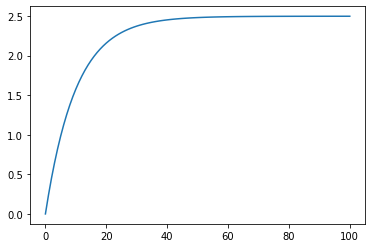

In [ ]:
import matplotlib.pyplot as plt

x = torch.tensor(np.random.uniform(-3, 5, 100), dtype=torch.float32)
# y = 2.5 * x + noise 
y = 2.5 * x + torch.normal(mean=0, std=0.4, size=x.shape) 

w = torch.tensor(0., dtype=torch.float32, requires_grad=True)

w_value_history = [
                   w.item()
]  # Python list with python numbers . item() transforms tensor to the python number

for i in range(100):
  loss = MSELoss(y, w * x)
  loss.backward() # gradient with respect to 'w'
  with torch.no_grad():  #  = "don't calculate gradients in the block below"
    '''
    It means whatever contains in block below, it is not required to 
    calculate gradient for. Follwoing calcuation would not be attached to 
    the calculation graph.
    '''
    w -= 0.01 * w.grad   # Learning rate * last value of the w

  w.grad.zero_()
  w_value_history.append(w.item())

plt.plot(w_value_history)
print(w_value_history[100])

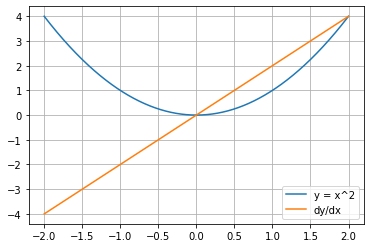

In [ ]:
x = torch.linspace(-2, 2, 1000, requires_grad=True)
y = x ** 2
'''
Note: since `x` and `y` are both vectors, the derivative is
 defined in the form of Jacobian dy/dx.
 For such cases `backward()` is implemented to calculate
 the Jacobian multiplied by some other vector that you
 have to provide as an argument e.g. `y.backward(some_vector)` -
 this will return Jacobian dy/dx times `some_vector`.

 Since our Jacobian is diagonal, the following code will return
 per-element derivative values:
 '''
y.backward(torch.ones_like(y))

plt.plot(x.detach(), y.detach(), label='y = x^2')
plt.plot(x.detach(), x.grad, label="dy/dx")
plt.legend();
plt.grid(True);

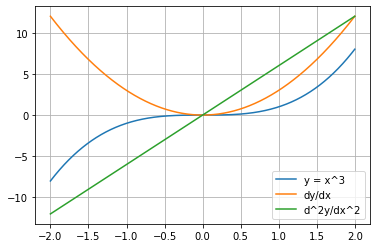

In [ ]:
x = torch.linspace(-2, 2, 1000, requires_grad=True)
y = x ** 3

first_derivative, = torch.autograd.grad(y, x, torch.ones_like(y), create_graph=True)
# "create_graph" required to be able to calculate derivative of the derivative later 
# The output is attached to the calculatin graph so it is essential to calculate the second derivative 


second_derivative, = torch.autograd.grad(first_derivative, x, torch.ones_like(first_derivative))
plt.plot(x.detach(), y.detach(), label='y = x^3')
plt.plot(x.detach(), first_derivative.detach(), label="dy/dx")
plt.plot(x.detach(), second_derivative, label="d^2y/dx^2")
plt.legend();
plt.grid(True);

In [ ]:
first_derivative.size() # It is vectore which is related to y elementwise

torch.Size([1000])